# Regression

Regression is a supervised learning task similar to classification. The major distinction between the two is that regression is (in most cases) used to predict a target variable which is continuous. An example problem would be of trying to predict the real estate price of a house based on features like the number of bathrooms, the distance from the highway e.t.c. This notebook focuses both on how to use premade models that will automatically find the values of the parameters, and on how to create implementations of algorithms that you can create as the user to find out how the models work under the hood.

In this notebook the following topics will be covered: -

1. Linear Regression
2. Gradient Descent
3. Polynomial Regression
4. Learning Curves
5. Regularised Linear Models
6. Logistic Regression


## 1. Linear Regression

A simple linear regression problem is very easy to understand. As stated earlier, regression is used to predict target values which are continuous. For example predicting the value of a house.

A linear model makes a prediction simply by computing a weighted sum of the input features, in addition to a bias term (called an intercept). A linear model hence has the same equation of that of the slope of the line equation (y = mx + c). This is because the logic of a linear model is to create a line that best fits the data, i.e. straight line that goes through most of the data.
<br>

$\hat{y} = \theta_{0}  + \theta_{1}x_{1} + \theta_{2}x_{2} + .. + \theta_{n}x_{n}$
<br>

In this equation:
* $\hat{y}$ is the predicted value
* n is the number of features
* $x_{i}$ is the ith feature variable
* $\theta_{j}$ is the jth model parameter (including the bias term $\theta_{0}$ and the feature weights $\theta_{1}, \theta_{2}$...)

This can be written in a much simpler fashion using vectorized form:

<br>

$\hat{y} = h_{\theta}(x) = \theta.x$

<br>

In this equation:

* $\theta$ is the models parameter vector containing the bias term $\theta_{0}$ and the feature vectors $\theta_{1}$ to $\theta_{n}$
* $x$ is the instance features vector containing $x_{0}$ to $x_{n}$ with $x_{0}$ always equal to 1.
* $\theta.x$ is the dot product of vectors \theta and x which is of course equal to $\theta_{0}x_{0}  + \theta_{1}x_{1} + \theta_{2}x_{2} + .. + \theta_{n}x_{n}$
* $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$


This is the linear regression model. To train it we set its parameters so that the model best fits the training set. We need a measure of how well the model performs so that we can tell whether it is improving or not. For classification we used metrics like Accuracy, F1, Precision, Recall ..., for Regression we will be using errors like MSE (mean squared error), RMSE (root mean squared error) e.t.c. To train a Linear Regression Model we need to find te value of $\theta$ that minimises the RMSE. It is actually simpler to minimise the MSE than the RMSE and it leads to the same result. MSE is calculated in the following manner.

<br>

$MSE (X, h_{\theta}$) =  $\frac{1}{m}$ * $\sum \limits _{i=1} ^ {m}$ ($\theta^T {x^i} - {y^i})^2$

<br>

To simply understand it, MSE is where we first find the error for each entry that is every y_true - y_pred, we then square this error and find the mean of these errors.

### 1.1 Normal Equation

To find the value of $\theta$ that minimises the cost function there is a closed form solution - in other words, a mathematical equation that gives the result directly. This is called a normal equation.

<br>

$\hat{\theta} = {({X^T}X)^{-1}} X^T y$

<br>

Eq:
* $\hat{\theta}$ is the value of $\theta$ that minimises the cost function
* $y$ is the vector of target values containing $y_{1}$ to $y_{m}$

To test this equation we will generate some linear looking data:

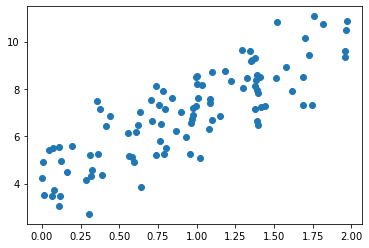

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)

Now we will compute $\hat{\theta}$ using the Normal equation. We will use inv() function from NumPy linear algerba model to compute the inverse of matrix, and the dot method for matrix multiplication.

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # adds x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function that we used to generate the data is $y = 4 + 3x_{1} +$ Gaussian noise.

In [3]:
theta_best

array([[4.19419399],
       [2.96285582]])

As seen above the model did not find the exact values instead it came quite close. In an ideal scenario we would have gotten values as 4 and 3. The reason we couldnt find it exactly was because of the noise.

Now to make predictions using $\hat{\theta}$:

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # adds x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.19419399],
       [10.11990563]])

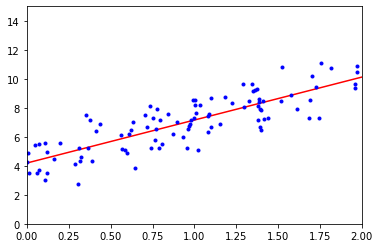

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple:

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(array([4.19419399]), array([[2.96285582]]))

Model also approximated almost the same values

In [7]:
model.predict(X_new)

array([[ 4.19419399],
       [10.11990563]])

The linear regression calls is based on scipy.linalg.lstsq() which stands for least squares (that is the method used to find param values)

### 1.2 Computation Complexity

The normal equation computes the inverse of $X^TX$ which is an (n + 1) x (n + 1) matrix (where n is the number of features). The computational complexity of inverting such a matrix is $O(n^{2.4})$ to $O(n^{3})$, depending on the implementation. In other words if you double the number of features you multiply the computational time by $2^{2.4} = 5.3$ to $2^3 = 8$

The SVD approach used by sklearn LinearRegression class is about $On^{2}$. If you double the number of features you multiply the computational time by roughly 4.

Both normal and SVD get slow as features grow large. But on a poitive side both are linear with regard to the number of instances in the training set (O(m)) so they handle large training sets efficiently provided they can fit in memory.

Once the model is trained, predictions are very fast, predictions on twice as many instances or features will takes twice as much time.

We will now learn how to train a Linear Regression model which is better suited for cases where there are a large number of features or too many training instances to fit in memory.


## 2. Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimum solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

As an example if you are at the top of a hill and it is surrounded by fog and you can only feel the slope of the ground under your feet, you will keep walking downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regard to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero you have reached a minimum.

Concretely you start by filling $\theta$ with random values (called random intialisation). Then you improve it gradually taking one step at a time each attempting to decrease the cost function until the algorithm converges to a minimum.

<br>
<center><img src="https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND." alt="Gradient Descent" height=300></center>
<br>

An important parameter in Gradient Descent is the size of the steps, determing by the **learning rate** parameter. If learning rate is too small, the algorithm will have to go through several iterations to converge which will take a long time. On the other hand if the learning rate is too high, you might jump cross the valley and end up even higher than before. This might make the algorithm diverge with larger and larger values failing to find a good solution

<br>
<center><img src="https://i.stack.imgur.com/au77i.png" alt="Gradient Descent" height=300></center>
<br>

Not all cost functions look like regular bowls as seen above instead there may be holes, ridges, plateaus and all sorts of irregularities which makes convergence to minimum difficult. Sometimes you could end up findind the local minimum which is not the same as the global minimum and you could also end up stopping thw iterative process before finding the global minimum.

<br>
<center><img src="https://www.i2tutorials.com/wp-content/media/2019/09/Neural-network-32-i2tutorials.png" alt="Gradient Descent" height=300></center>
<br>

Fortunately the MSE cost function for Linear Regression model happens tp be a covex function which means that if you pick any two points on the curve the line segment joining the two points never crosses the curve. This implies that there are no local minimum only one global minimum.It is also a continuous function with a slope that never changes abruptly. These two facts have a major consequence, that is Gradient Descent is guarenteed to approach arbitarily close to the global minimum (if enough iterations, and learning rate is not too high)

The cost function has the shape of a bowl, but it can be an elongated bowl if features have different scales. 

<br>
<center><img src="https://www.oreilly.com/api/v2/epubs/9781491962282/files/assets/mlst_0406.png" alt="Gradient Descent" height=300></center>
<br>

The left one reaches it quickly as it goes straight to the minimum and the right one without the scaling does not do the same rather it goes in an almost orthogonal direction compared to the global minimum. It will reach the global minimum but it will take a long time.

Therefore it is important to use a scaler (sklearn StandardScaler) to ensure features all have a similar scale before fitting the data.

This also illustrates the fact that training a model means searching for a combination of model parameters that minimises a cost function (over the training set). It is a search in the models parameter space. The more parameters a model has the more dimensions the space has, and the harder the search is.

### 2.1 Batch Gradient Descent

To implement Gradient descent you need to compute the gradient of cost function with regard to each model paramter $\theta_{j}$. Simply put you need to calculate how much the cost function will change if you change $\theta_{j}$ a little bit. This is called partial derivative. Taking the previous mountain slope example, it is like asking what is slope if you face east, and then the same for north, south ... and so on for all dimensions depending in the scenario. The following equation computes the cost function with regard to parameter $\theta_{j}$ noted $\frac{\partial{MSE(\theta)}}{\partial{\theta_{j}}}$.

<br>

$\frac{\partial{MSE(\theta)}}{\partial{\theta_{j}}} = \frac{2}{m}\sum \limits_{i=1}^{m} (\theta^Tx^{(i)}-y^{(i)})x_{j}^{(i)}$

<br>

Instead of computing these partial derivates individually you can compute them all in one go. The gradient vector noted $\nabla_{\theta}MSE(\theta)$, contains all the partial derivates of the cost function (one for each model parameter).

<br>

$\nabla_{\theta}MSE(\theta) = [\frac{\partial{MSE(\theta)}}{\partial{\theta_{0}}} + \frac{\partial{MSE(\theta)}}{\partial{\theta_{1}}} + .. \frac{\partial{MSE(\theta)}}{\partial{\theta_{n}}}] = \frac{2}{m}X^T(
X\theta - y)$

<br>

Note: Remember that this formula includes the calculations over the full training set X at each Gradient Descent Step. This is why the training algorithm is called Batch Gradient Descent, it uses the whole batch of training data at every step (Full Gradient Descent is a more apt name). This is as a result very slow on large training sets. However Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

Once you have the gradient vector which points uphill just go in the opposite direction to go downhill that means subtract $\nabla_{\theta}MSE(\theta)$ from $\theta$.

This is where learning rate $\eta$ is important: multiply the gradient vector by $\eta$ to determine the size of the downhill step.

$\theta^{(next step)} = \theta - \eta\nabla_{\theta}MSE(\theta)$

To implement this in python.


In [8]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)   # random initialisation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.19419399],
       [2.96285582]])

This result is exactly what the normal equation found. Gradient Descent therefore worked perfectly.

To find a good learning rate you can use grid search. However it is a good decision to limit the number of iterations so that grid search can eliminate models that take too long to converge.

To know how many iterations to use, it is good practice to set a large number of iterations and to interrupt the algorithm when the gradient vector becomes very tiny ie the norm becomes smaller than a tiny number $\epsilon$ called the tolerance, this happens when Gradient Descent has almost reached the minimum.

When the cost function is convex and its slope does not change abrptly (as is the case for MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution but you may have to wait a while $O(1/\epsilon)$ iterations to reach the optimum within a range of $\epsilon$, depending on the shape of the cost function. If you divide the tolerance by 10 to have a more precise solution the algorithm may have to run about 10 times longer.

### 2.2 Stochastic Gradient Descent

The main problem with Batch Gradient Descent is that it uses the whole training set to compute the gradients at every step, which makes it very slow when the set is large. Stochastic gradient Descent is on the opposite extreme, it takes a random instance every step of the way and computes the gradients for that step on just that single instance. This makes it uch faster as it needs to load only one instance in memory. It is also makes it possible to train on large training sets.

Due its stochastic (random) nature it does not smoothly go towards the minimum but will instad go up and down, however it will reduce on an average, even once it reaches the minimum it will continue to bounce around. The final values hence are good but not optimal.

When the cost function is very irregular this helps as the algorithm will jump out of the local minima so Stochastic Gradient Descent has a better chance of finding global minima than Batch Descent.

The randomness therefore is good to escape local minima but hard to reach a optimal solution. To counter this we can change the learning rate, by using a large learning rate in the beginning to escape from local minmium and a smaller one as time passes on to reach an optimum solution, The function that determines the learning rate is called the learning schedule.

To implement stochastic gradient descent.

In [9]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialisation

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.21492581],
       [2.962032  ]])

We iterate by rounds of m iterations, each round is called an epoch. While the Batch gradient Descent code iterated 1000 times through the whole training ser. This code goes through it 50 times and reaches a pretty good solution.

It is important to remember that since instances are picked randomly some instances may be picked multiple times per epoch while other may not be picked. Be sure that algorithm goes through every instance at each epoch or shuffle the training set. Then go through instance by instance and shuffle it again.

To perform linear regression using stochastic gd use the SGDRegressor class of sklearn which defaults to optimising the squared error cost function. The following implemntation does not use any regularisation (penalty=None)

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,penalty=None, eta0=0.1)
# eta0 - starting learning rate, tol - will run till loss drops below this value
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16631865]), array([2.96322922]))

### 2.3 Mini-Batch Gradient Descent

Mini batch gradient descent is like a combination of the previous two gradient descents. Unlike SGD mini batch gradient descent trains on small random sets of instances of the data at every step, these are called mini-batches. The main advantage of SGD is that they can get a performance boost from hardware optimisation of matrix operations especially while using GPUs.

Algorithms progress in parameter space is less erratic than with SGD. However mini-batch finds it harder to escape the local minima and cotinues to walk around even after reaching solution space. Must remember that this can be overcome by using a good learning schedule.

<br>
<center><img src="https://miro.medium.com/max/1400/1*9calCrrqS9opiytuA--7AA.png" alt="Comparison Plot" height=300></center>
<br>

A comparison of algorithms would be as follows: -

<br>
<center><img src="https://pic4.zhimg.com/v2-b921c7e730e0578e3fd0322ef9d0d53b_b.jpg" alt="Comparison" height=300></center>
<br>


## 3. Polynomial Regression

There are certain scenarios where your datas feature variables and target variable do not have a linear realtionship, rather the data could be plotted as a curve. In this scenarios we cannot use a linear solution, however we could change a linear model in such a way to work with non-linear data. This can be done simply by adding powers of each feature as new features, then training a linear model on this extended set of features. This technique is called Polynomial Regression.

For example:
$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{1}^2 + ... + \theta_{n}x_{1}^n$

Generating some non-linear data using a quadratic equation and some noise.

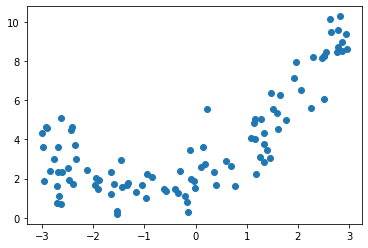

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 +np.random.randn(m, 1)
plt.scatter(X, y)

As observed a straight line cant fit this data properly, so we will use Scikit-Learns PolynomialFeatures class to transform our training data, adding the square (second degree polynomial) of each feature in the training set as a new feature.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.76630504]), array([2.76630504, 7.65244356]))

X_poly now contains the original feature of X plus the square of this feature. Now you can fit a Linear Regression model to this extended training data.

In [13]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
lin_reg_poly.intercept_, lin_reg_poly.coef_

(array([2.0554101]), array([[1.07564221, 0.5151869 ]]))

Model estimates $\hat{y} = 0.46x_{1}^2 + 1.01x_{1} + 2.12$ when the actual function was $y = 0.5x_{1}^2 + 1.0x_{1} + 2.0 + $ Gaussian noise

**NOTE IMP:** When there are multiple features Polynomial Regression is capable of finding relationships between features which is something a plain Linear Regression mode cannot do. This is made possible by the fac that PolynomialFeatures also adds all combinations of features upto the given degree. For example if there were two features a, b, Polynomial Featurs with degree 3 would not only add the features $a^{2}, a^{3}, b^{2}, b^{3}$, but also all the combinations $ab, a^2b, ab^2$

PolynomialFeatures (degree=d) transforms an array containing n features into an array containing $\frac{(n+d)!}{d!n!}$ where $n!$ is the factorial of n = 1 x 2 x .. x n. As a result there will be a large number of combinations which could make this model slow.


## 4. Learning Curves

If you perform a very high degree polynomial regression then the model will fit to the data in a much better manner the problem however is that there is a very high chance of overfitting. When a model overfits it performs well on training data but poorly on test data i.e. the model has learnt the patterns of training data too well and cannot generalise well enough to unseen data.


<br>
<center><img src="https://www.researchgate.net/publication/339680577/figure/fig2/AS:865364518924290@1583330387982/llustration-of-the-underfitting-overfitting-issue-on-a-simple-regression-case-Data.png" alt="Polynomial Regression Overfitting" height=300></center>
<br>


We can use cross validation to find out performance of the model another method is to use learning curves: plots of the models performance on the training and validation set. To generate the plots we train the models several times on different sized subsets of training set. Implementation is as follows: -

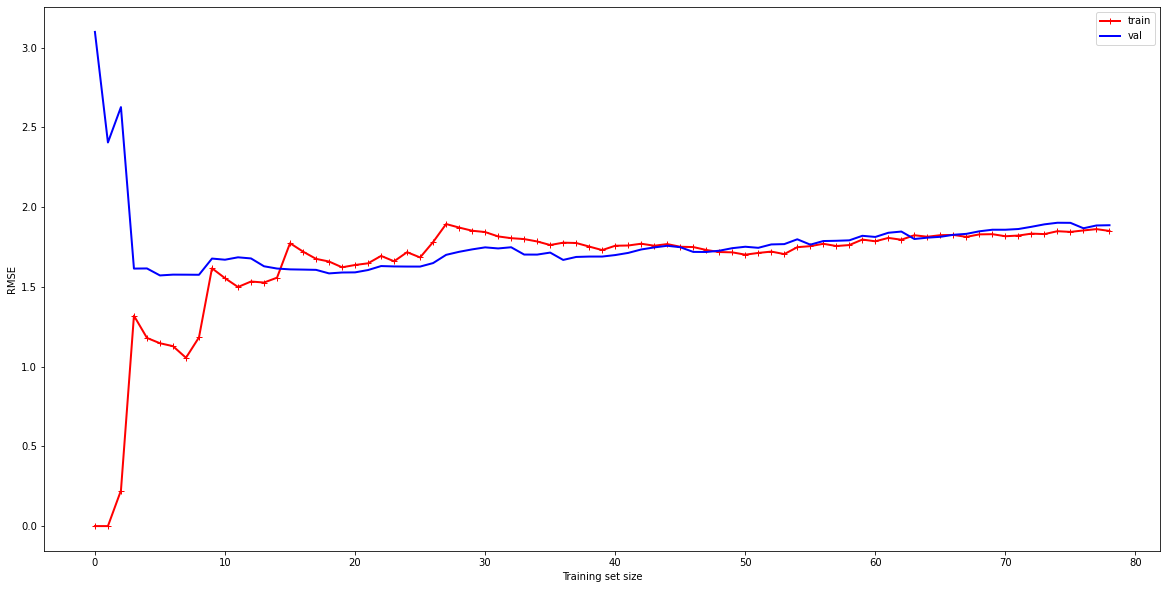

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    plt.figure(figsize=(20, 10))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()


lin_reg_model = LinearRegression()
plot_learning_curves(lin_reg_model, X, y)

We can now analyse this plot, we can see that initially, when we have few training instances the train error is very low, as it must learn very less however validation error is high because it cannot generalise as we increase the instances eventually they both reach a plateau after which the performance does not seem to improve this is a good example of the model **underfitting** the data (since the curves have reached a plateau are close and fairly high). We need a more complex model to solve this.

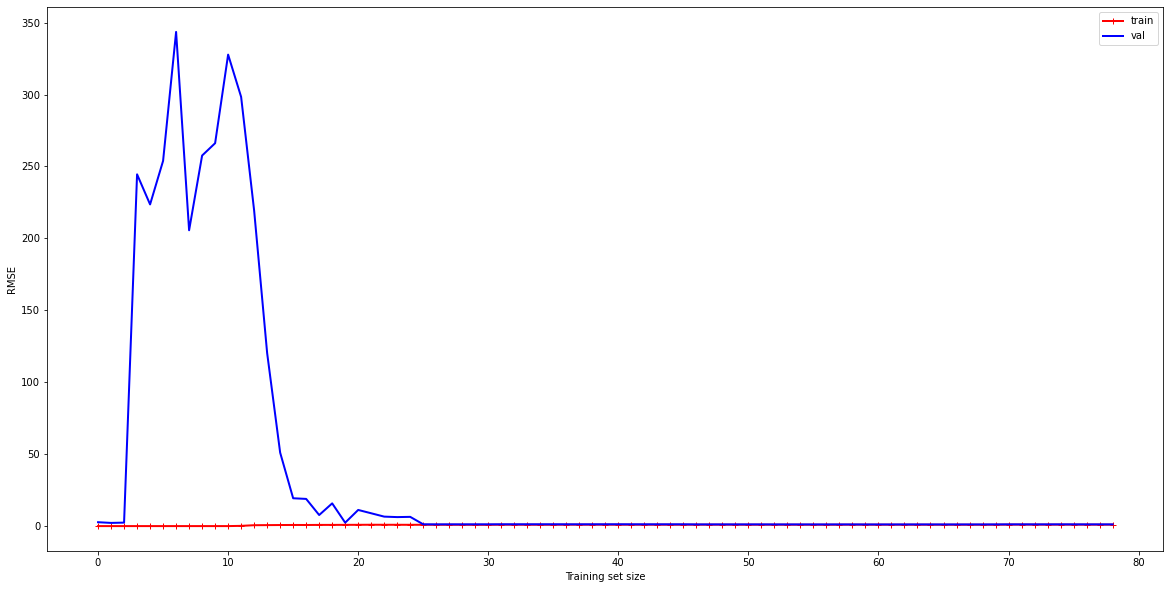

In [15]:
from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
    ])

plot_learning_curves(poly_reg, X, y)

The error on training data is much lower and even the val error is a lot lower and plateaus, there is however a gap between curves which means the model is overfitting, using a larger dataset would help.


A models generalisation error can be expressed as the sum of three very different errors: -
1. Bias - this is error due to wrong assumptions, such as assuming model is linear when it is quadratic. A high bias model is likely to underfit data
2. Variance - this is error due to models excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high degree polynomial model) is likely to have a high variance and overfit the training data.
3. Irreducible error - this is due to noisiness of the data itself. Only way to reduce this is to clean the data (eg fix the sources, remove outliers)

Increasing a models complexity increases variance, a reduces bias and vice verse for reducing its complexity. Hence there is a tradeoff, where we need to reach a good middle ground, so that model does not overfit or underfit.


## 5. Regularised Linear Models

A good way to reduce overfitting is to regularise a model: the fewer degrees of freedom it has the harder it will be for it to overfit the data. A simple way to regularise a polynomial model is to reduce the number of polynomial degrees.

For a linear model regularisation is typically achieved by constraining the weights of the model.

This section will be broken up into the following subsections: -
1. Ridge Regression
2. Lasso Regression
3. Elastic Net
4. Early Stopping


### 5.1 Ridge Regression

Ridge regression is a regularised version of Linear Regression: a regularisation term equal to $\alpha\sum \limits_{i=1}^{n}\theta_{i}^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. The regulairsation term should be added to the cost function only during training. Once the model is trained, you want to use the unregularised performance measure to evaluate the models performance.

It must be remembered that sometimes the cost function used during training be different from the performance measure used during testing. Apart from regularisation, this is done as the cost function should have optimisation friendly derivatives while the performance measure used for testing should be as close as possible to the final objective for example Classifiers are often trained using log loss cost function and are tested using precision/recall.

The hyperparameter $\alpha$ controls how much you want to regularise the model. If $\alpha$ = 0 the Ridge Regression is just Linear Regression. If $\alpha$  is very lage then all the weights end up close to zero and the result is a flat line going through the datas mean. The cost function for Ridge Regression is as follows: -

$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum \limits_{i=1}^{n} \theta_{i}^2 $

The bias term $\theta_{0}$ is not regularised (the sum starts at i=1, not 0). If we define w as the vector for feature weights ($\theta_{1}$ to $\theta_{n}$), then the regularisation is equal to $\frac{1}{2}(|| w ||_{2})^2$ where $|| w ||_{2}$ represents the $\ell_{2}$ norm of the weight vectors. For gradient descent just add $\alpha w$ to the MSE gradient vector.

**NOTE:** Data should always be scaled using a StandardScaler before using regularised models as they are sensitive to the scale of the data.

Using a plan ridge model will lead to linear predictions, if we expand data using polynomial features, then scale it using a standard scaler and then apply the ridge model, it is then polynomial regression with ridge regularisation. In this case increasing the $\alpha$ as seen in example below leads to less extreme, more reasonable predictions. Our models bias increases and variances falls, hence it is less susceptible to overfitting.

<br>
<center><img src="https://www.oreilly.com/api/v2/epubs/9781491962282/files/assets/mlst_0412.png" alt="Ridge Regression Different alpha" height=300></center>
<br>

As with Linear Regression we can perform Ridge Regression either by computing a closed form equation or by performing gradient Descent. The pros and cons are the same. The following is the closed form slution where $A$ is the (n + 1) x (n + 1) identity matrix except with a 0 in the top left cell corresponding to the bias term.

$\hat{\theta} = (X^TX + \alpha A)^{-1} X^T y $

Implementation of closed form is as given below.


In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky') # check cholesky method vs svd method performance difference
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.445197]])

In [17]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.41598812])

The penalty hyperpaameter sets the type of regularisation term to use. Specifying "l2" indicates that you want SGD to add a regularisation term to the cost function equal to half the square of the $\ell_{2}$ norm of the weight vetor: simply Ridge Regression.


### 5.2 Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression simply called Lasso Regression is another regularised version of Linear Regression: just like Ridge Regression, it adds a regularisation term to the cost function, but it uses the $\ell_{2}$ norm. The lasso regression cost function is as follows: -

$J(\theta) = MSE(\theta) + \alpha \sum \limits_{i=1}^{n} |\theta_{i}| $

The following plots are the same as before just using lasso models instead of ridge models and using smaller $\alpha$ values.

<br>
<center><img src="https://www.oreilly.com/api/v2/epubs/9781492032632/files/assets/mls2_0418.png" alt="Lasso Regression Different alpha" height=300></center>
<br>

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features. For example, the dashed line in the righthand plot ($\alpha = 10^{-7}$) looks quadratic, almost linear, all the weigths for high degree polynomial features are equal to zero. In other words Lasso Regression automatically performs feature selection and outputs a sparse model (i.e. with few nonzero feature weights).

The gradients get smaller as you approach global optimum, so Gradient descent natutrally slows down which helps convergence. The optimal parameters get closer and closer to origin when you increase $\alpha$ but they never get eliminated entirely.

To avoid Gradient Descent from bouncing arond the optimum at the end when using Lasso, you can gradually reduce the learinng rate during training (it will still bounce around the optimum, but the steps will get smaller and smaller so it will converge).

The lasso function is not differentiable at $\theta_{i} = 0$ (for i = 1, 2, .. n). But gradient descent still works fine if you use a subgradient vector $g^{13}$ instead when any $\theta_{i} = 0$.

An implementation of Lasso class is as follows:



In [18]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.40614685])

Equivalent to this would be using SGRegressor(penalty="l1")


### 5.3 Elastic Net

Elastic Net is a middle ground between Ridge and Lasso regression. The regularisation term is a simple mix of both Ridge and Lasso regularisation terms, you can control this mix ratio r. When it is 0 then it is equivalet to Ridge Regression, when it is 1 it is equivalent to Lasso Regression. The cost function of Elastic Net is as follows: -

$J(\theta) = MSE(\theta) + r\alpha \sum \limits_{i=1}^{n} |\theta_{i}| + \frac{1 - r}{2}\alpha\sum \limits_{i=1}^{n} \theta_{i}^2$

The question arises as to when should we use plain Linear Regression and when should we use Ridge, Lasso, Elastic Net. It is almost always preferable to have some amount of regularisation, so you should generally avoid plain Linear Regression. Ridge is a good default but in a scenario where you feel only some features are useful you can use Lasso or Elastic Net. It is preferrable to avoid Lasso and use Elastic Net because Lasso may behave erraticaly when the number of features is greater than the number of training instances or when several features are strongly correlated.

An example implementation of Elastic Net (l1_ratio corresponds to the mix ratio r):

In [19]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.40689748])

### 5.4 Early Stopping

Early stopping performs just as the name suggests, it is built on the concept that at once point the validation error will reach a minimum value after which it will start to climb again. The model that produces this minimum value error is the model that should be used as when the error starts to rise again it indicates that the model has overfitted the data. Sometimes it is not as easy to find the minimum as the slope can be filled with ridges and plateaus, in this case we take hold of the error and keep iterating for a while once it starts to rise we roll back to the point when error was low.

<br>
<center><img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/early-stopping-en.png?a8aacdfe0c39776d86764857222e19dd" alt="Early Stopping" height=300></center>
<br>

An implementation of early stopping is as follows: -

In [20]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# prepare data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005) 
# warm start being true means it continues where it left off, instead of starting from scratch

minimum_val_error = float('inf')

best_epoch=None
best_model=None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())  # continues where it left off because of warm start
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print(f"Best Epoch: {best_epoch}")
print(f"Minimum Val Error: {minimum_val_error}")

Best Epoch: 997
Minimum Val Error: 2.9538705699004297


## 6. Logistic Regression

Some regression algorithms can also be used for classification. Logistic Regression is one example of such an algorithm. Logistic Regression can be used to predict the probability that a instance belongs to a specific class, if predicted more than 50% it belongs to that class (called the positive class: labelled "1") else it belongs to the other (the negative class labelled "0"). This makes it a binary classifier. Logistic Regression can be used for multiclass classification as by default it implements it as an OvO or OvR (one vs one or one vs rest) problem.

This section will be broken up into the following subsections: -
1. Estimating probabilities
2. Training and Cost function
3. Decision Boundaries
4. Softmax Regression

### 6.1 Estimating Probabilities

Similar to a Linear Regression model a Logistic Regression Model computes the weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result. Equation for probability is as follows: -

$\hat{p} = h_{\theta}(x) = \sigma(x^T\theta) $

The logistic $\sigma$ is a sigmoid function (S-shaped) that outputs a number between 0 and 1.

$\sigma(t) = \frac{1}{1 + exp(-t)}$

<br>
<center><img src="https://ai-master.gitbooks.io/logistic-regression/content/assets/sigmoid_function.png" alt="Early Stopping" height=300></center>
<br>

Once the logistic regression model as estimated the probability $\hat{p} = h_{\theta}(x)$ that an instance x belongs to the positive class, it can make prediction $\hat{y}$ easily: -

$\hat{y} = 0$ if $\hat{p} < 0.5$ else $1$ if $\hat{p}  >= 0.5 $

The score t is often called logit. The name comes from the fact that the logit function defined as logit(p) = log(p / (1- p) ) is the inverse of the logistic function.


### 6.2 Training and Cost Function

The objective of training function is to give high probability to the instances that belong to the positive class and a low probability to those that belong to the negative class. This can be shown by the below by the function given for a single training instance (x): -

c(0) = $-\log(\hat{p})$ if y = 1 or $-\log(1 - \hat{p})$ if y = 0

This cost function makes sense because as -log(t) grows large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, it will also be large if the model estimates a probability close to 1 for a negative instance. On the other hand -log(t) is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is average cost over all training instances can be written as a single expression called log loss.

$J(\theta) = -\frac{1}{m} \sum \limits_{i=1}^{m} [y^{(i)}\log(\hat{p}^{(i)}) + (1 - y^{(i)})\log(1 - \hat{p}^{(i)})] $

There is no known closed form equation to compute the value of $\theta$ that minimises the cost function (no equivalent normal equation). Since the cost equation is convex the Gradient Descent (or any other optimisation algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enougn).


### 6.3 Decision Boundaries

The dataset to be used will be the iris dataset which contains the sepal, petal length and width of 150 iris flowers of three different species. We will build a classifier to detect one of the class types based only on the petal width feature.

In [21]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [22]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(int) # 1 if our class else 0

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

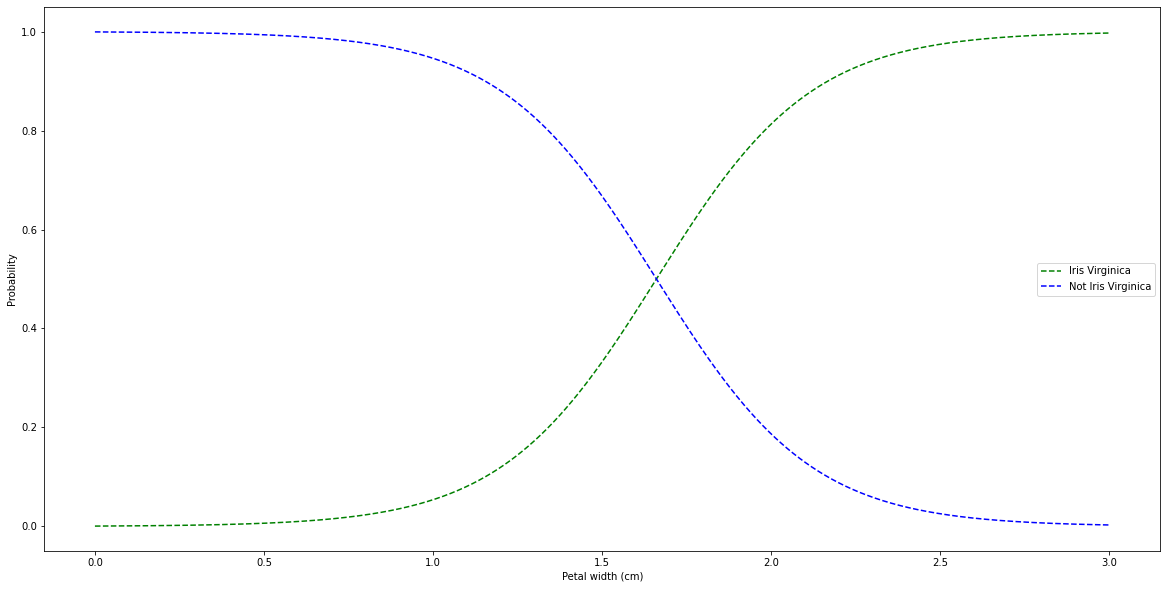

In [24]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)
plt.figure(figsize=(20,10))
plt.plot(X_new, y_prob[:, 1], "g--", label="Iris Virginica")
plt.plot(X_new, y_prob[:, 0], "b--", label="Not Iris Virginica")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.show()

The decision boundary here is around 1.5 where the model starts to become sure, if the width is above 1.5 it is sure that it belongs to positive class else it is negative class. The decision boundary is where the two overlap.

In [25]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Just like other linear models Logistic Regrewssion models can be regularised by $\ell_{1}$ or $\ell_{2}$ penalties. Sklearn adds $\ell_{2}$ penalty by default. The hyperparameter controlling the regularisation strength of a sklearn LogisticRegression model is not alpha but its inverse C. The highr the value of c less the model is regularised.

### 6.4 Softmax Regression

Logistic Regression can be generalised to support multiple classes directly without having to train and combine multiple binary classifiers. This is called Softmax Regression or Multinomial Logistic Regression.

The concept is that when an instance x is given the model first computes a score $s_{k}(x)$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalised exponential) to the scores. The equation to compute $s_{k}(x)$ is similar to Linear Regression prediction. Equation for softmax score for class k is: -

$s_{k}(x) = x^T\theta^{(k)} $

Each class has its own dedicated parameter vector $\theta^{(k)} $ All are stored in a parameter matrix. Once you compute the score of every class for x, you estimate probability that instance belongs to k by running the scores through a softmax function. Function computes the exponential of every score, then normalises them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds.

$ \hat{p} = \sigma(s(x))_{k} = \frac{exp(s_{k}(x))}{\sum \limits_{j = 1}^{k}exp(s_{j}(x))} $

In this equation: -
* K is the number of classes
* s(x) is a vector containing scores of each class for instance x
* $\sigma(s(x))_{k}$ is the estimated probability that the instance x belongs to class k given the scores for each class of that instance.

Just like Logistic Regression classifier the Softmax Regression classifier predicts the class with the highest estimated probability (class with the highest score).

$ \hat{y} = argmax \sigma(s(x))_{k} = argmax s_{k}(x) = argmax ((\theta^{(k)})^Tx) $

The argmax operator returns the value of variable that maximises the fucntion. In this equation it returns the value of k that maximises the estimated probability of $\sigma(s(x))_{k}$.

The softmax regression classifier predicts only one class at a time i.e., it is multiclass not multioutput so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognise multiple people in one picture.

The objective is to have a model that estimates a high probability for target class and a low probability for other classes. Minimising the cost function is done using a formula called cross-entropy, this will lead to this result as it penalises the model when it estimates low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.

Lets use softmax regression to classify the iris flowers into all three classes. Sklearn uses OvR by default when you train on multiple classes but you can set multi_class hyperparameter to multinomial to switch it to Softmax Regression. You must also specify a solver such as "lbfgs" solver. It also applies $\ell_{2}$ regularisation by default, which you can control using C.

In [26]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [27]:
softmax_reg.predict([[5, 2]])

array([2])

In [28]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## 7. Exercises

1. Create notebooks for the different types of gradient descents and plot animations as they approach the optimal solution.
2. Create a project to predict the real estate prices based on information of how many garages a house has, distance from a mall e.t.c.
3. Create a project for medical cost predictions to help insurance companies decide their premium rates